In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("BASELINE.csv")
df2 = pd.read_csv("DISCOVERY.csv")

df1["source"] = "BASELINE"
df2["source"] = "NET LOSS"

df1["Time"] = pd.to_datetime(df1["Time"])
df2["Time"] = pd.to_datetime(df2["Time"])

offset = df1["Time"].min() - df2["Time"].min()
df2["Time"] = df2["Time"] + offset

df1["Time"] = (df1["Time"] - df1["Time"].min()).dt.total_seconds() / 60
df2["Time"] = (df2["Time"] - df2["Time"].min()).dt.total_seconds() / 60

delay1 = 600 / 60  
delay2 = 1800 / 60 
duration = 600 / 60 

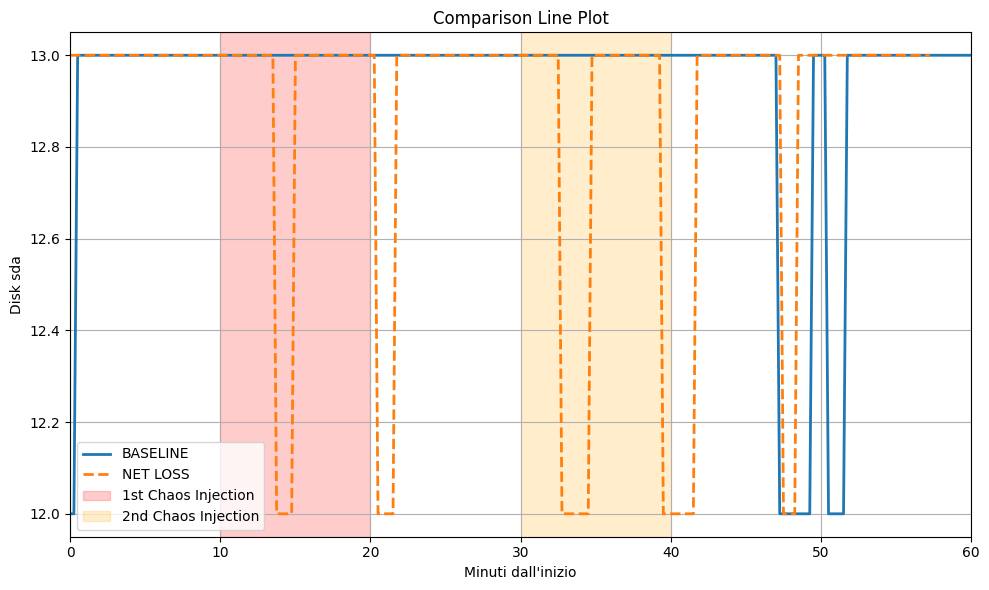

In [9]:
df1 = pd.read_csv("BASELINE.csv")
df2 = pd.read_csv("NET_LOSS.csv")

df1["source"] = "BASELINE"
df2["source"] = "NET LOSS"

df1["Time"] = pd.to_datetime(df1["Time"])
df2["Time"] = pd.to_datetime(df2["Time"])

offset = df1["Time"].min() - df2["Time"].min()
df2["Time"] = df2["Time"] + offset

df1["Minutes"] = (df1["Time"] - df1["Time"].min()).dt.total_seconds() / 60
df2["Minutes"] = (df2["Time"] - df2["Time"].min()).dt.total_seconds() / 60

delay1 = 600 / 60  # minuti
delay2 = 1800 / 60 # minuti
duration = 600 / 60 # minuti

plt.figure(figsize=(10, 6))
plt.plot(df1["Minutes"], df1["disk sda"], label="BASELINE", linewidth=2)
plt.plot(df2["Minutes"], df2["disk sda"], label="NET LOSS", linewidth=2, linestyle='--')

plt.axvspan(delay1, delay1 + duration, color='red', alpha=0.2, label="1st Chaos Injection")
plt.axvspan(delay2, delay2 + duration, color='orange', alpha=0.2, label="2nd Chaos Injection")

plt.xlabel("Minuti dall'inizio")
plt.ylabel("Disk sda")
plt.title("Comparison Line Plot")
plt.xlim(0, 60)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

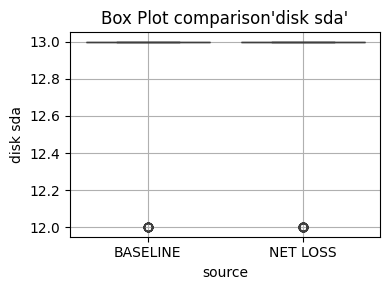

In [10]:
combined = pd.concat([df1, df2])

plt.figure(figsize=(4, 3))
sns.boxplot(x="source", y="disk sda", data=combined)
plt.title("Box Plot comparison'disk sda'")
plt.grid(True)
plt.tight_layout()
plt.show()


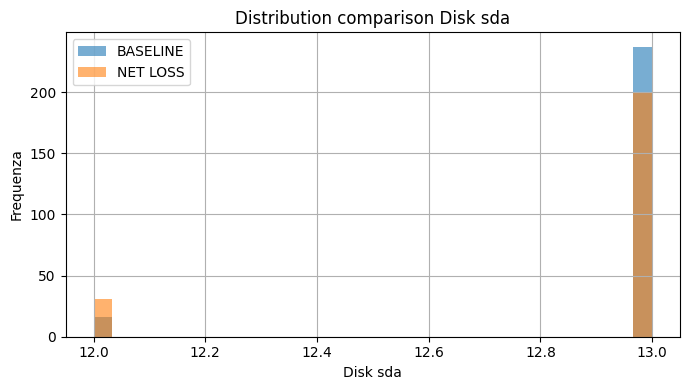

In [11]:
plt.figure(figsize=(7, 4))
plt.hist(df1["disk sda"], bins=30, alpha=0.6, label="BASELINE")
plt.hist(df2["disk sda"], bins=30, alpha=0.6, label="NET LOSS")
plt.xlabel("Disk sda")
plt.ylabel("Frequenza")
plt.title("Distribution comparison Disk sda")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


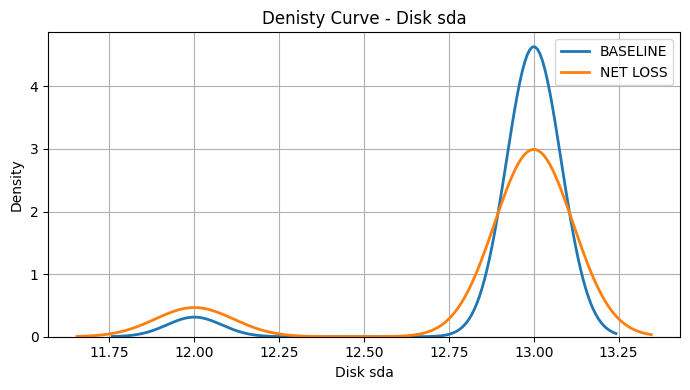

In [12]:
plt.figure(figsize=(7, 4))
sns.kdeplot(df1["disk sda"], label="BASELINE", linewidth=2)
sns.kdeplot(df2["disk sda"], label="NET LOSS", linewidth=2)
plt.title("Denisty Curve - Disk sda")
plt.xlabel("Disk sda")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
